<a href="https://colab.research.google.com/github/FarukKaramanVektorel/yz/blob/master/SeraGazi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

In [2]:
import pandas as pd

# Excel dosyalarını yükleyin
data_gas = pd.read_excel("sera-gazlari.xlsx")
data_sector = pd.read_excel("sektorler.xlsx")

# Sütun adlarını kontrol edin
print("Gaz Türleri Veri Seti Sütun Adları:")
print(data_gas.columns)
print("\nSektörler Veri Seti Sütun Adları:")
print(data_sector.columns)

Gaz Türleri Veri Seti Sütun Adları:
Index(['Yıl', 'Toplam', 'CO2', 'CH4', 'N2O', 'F-gazlar'], dtype='object')

Sektörler Veri Seti Sütun Adları:
Index(['Yıl', 'Toplam', '1990 yılına göre değişim', 'Enerji',
       'Endüstriyel işlemler ve ürün kullanımı', 'Tarım', 'Atık'],
      dtype='object')


In [3]:
# Sütun adlarını temizleme
data_gas.columns = data_gas.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')
data_sector.columns = data_sector.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')

# Veri setlerini "Yıl" sütununa göre birleştirme
merged_data = pd.merge(data_gas, data_sector, on="Yıl")

# Birleştirilmiş veri setini görüntüleme
print("Birleştirilmiş Veri Seti:")
print(merged_data.head())

Birleştirilmiş Veri Seti:
    Yıl  Toplam_x    CO2   CH4   N2O  F-gazlar  Toplam_y  \
0  1990     228.0  154.1  51.3  22.2       0.4     228.0   
1  1991     235.4  160.6  52.3  22.0       0.5     235.4   
2  1992     241.8  166.7  52.2  22.4       0.5     241.8   
3  1993     249.1  173.8  51.8  23.2       0.5     249.1   
4  1994     242.8  170.1  51.3  20.9       0.4     242.8   

  1990_yılına_göre_değişim  Enerji  Endüstriyel_işlemler_ve_ürün_kullanımı  \
0                        .   143.1                                    22.7   
1                      3.2   147.5                                    24.4   
2                      6.1   154.0                                    24.1   
3                      9.3   160.4                                    24.6   
4                      6.5   156.8                                    24.0   

   Tarım  Atık  
0   51.8  10.3  
1   52.9  10.7  
2   52.7  11.0  
3   52.8  11.3  
4   50.3  11.7  


In [5]:
pip install matplotlib

In [6]:
pip install seaborn

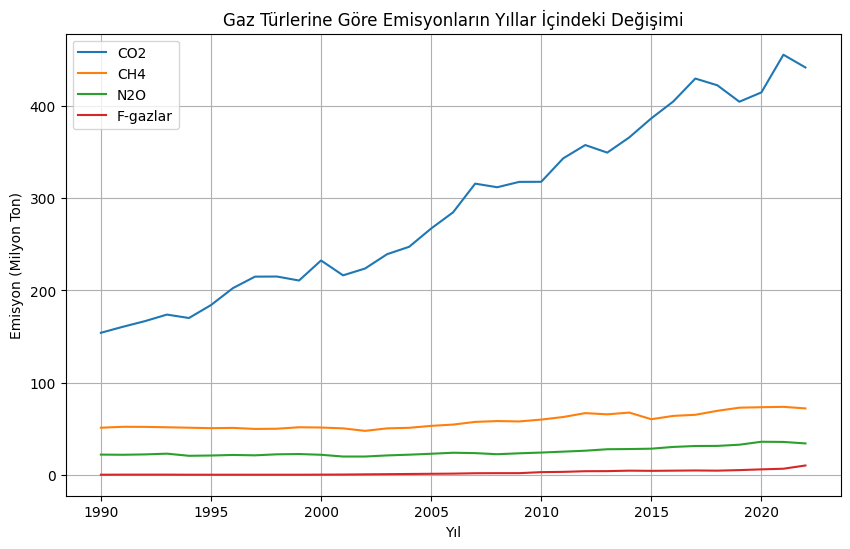

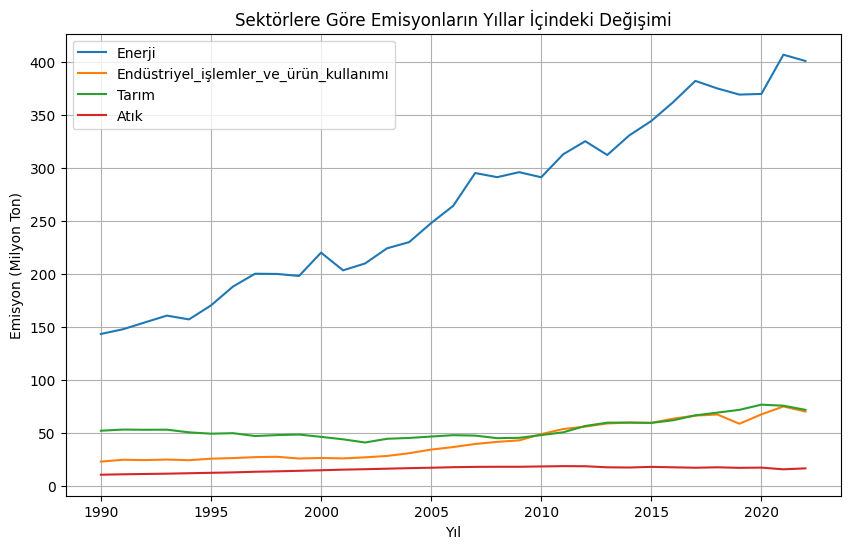

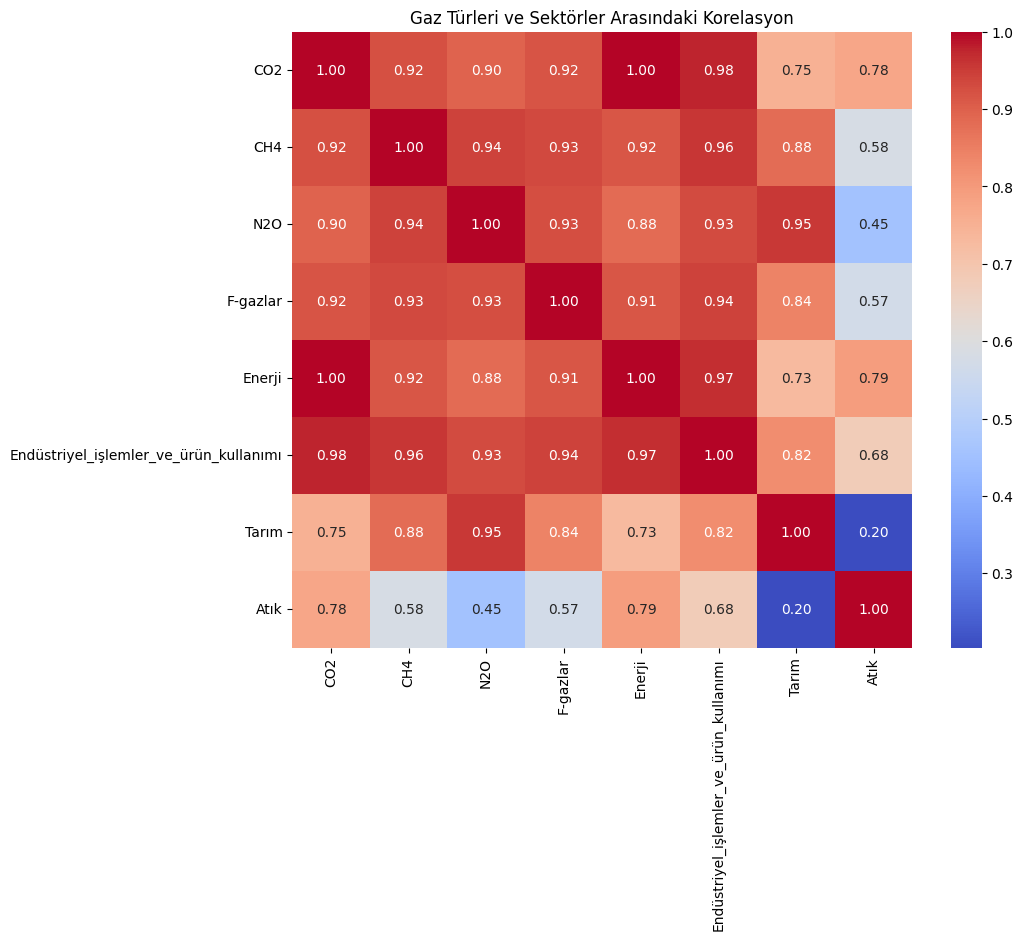

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gaz türlerine göre toplam emisyonların yıllar içindeki değişimi
plt.figure(figsize=(10, 6))
for col in ["CO2", "CH4", "N2O", "F-gazlar"]:
    plt.plot(merged_data["Yıl"], merged_data[col], label=col)
plt.title("Gaz Türlerine Göre Emisyonların Yıllar İçindeki Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Emisyon (Milyon Ton)")
plt.legend()
plt.grid()
plt.show()

# Sektörlere göre toplam emisyonların yıllar içindeki değişimi
plt.figure(figsize=(10, 6))
for col in ["Enerji", "Endüstriyel_işlemler_ve_ürün_kullanımı", "Tarım", "Atık"]:
    plt.plot(merged_data["Yıl"], merged_data[col], label=col)
plt.title("Sektörlere Göre Emisyonların Yıllar İçindeki Değişimi")
plt.xlabel("Yıl")
plt.ylabel("Emisyon (Milyon Ton)")
plt.legend()
plt.grid()
plt.show()

# Gaz türleri ve sektörler arasındaki korelasyonu analiz edin
correlation_matrix = merged_data[["CO2", "CH4", "N2O", "F-gazlar", "Enerji", "Endüstriyel_işlemler_ve_ürün_kullanımı", "Tarım", "Atık"]].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Gaz Türleri ve Sektörler Arasındaki Korelasyon")
plt.show()

In [8]:
pip install statsmodels


In [9]:
pip install scikit-learn

Gelecekteki Emisyon Tahminleri:
    Yıl  Tahmin Edilen Emisyon
0  2023             566.912879
1  2024             578.079055
2  2025             589.245232
3  2026             600.411408
4  2027             611.577585
5  2028             622.743761
6  2029             633.909938
7  2030             645.076114


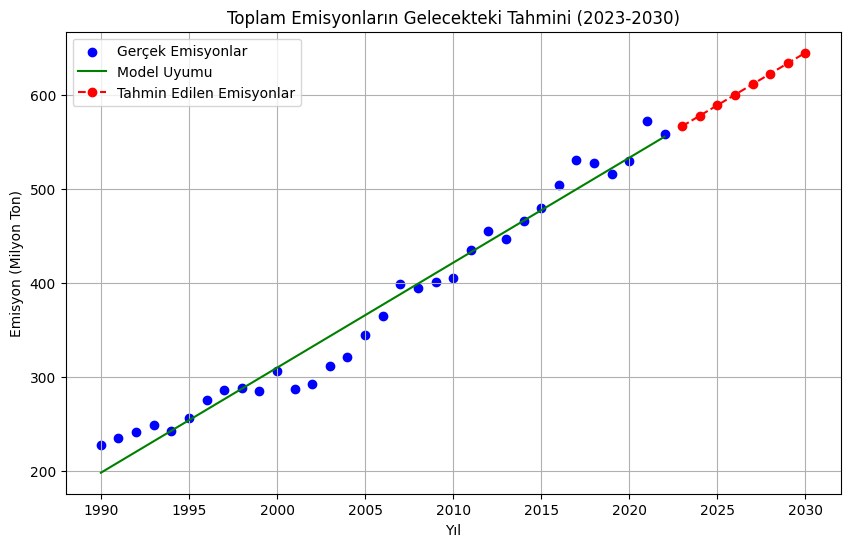


Model Katsayısı (Eğim): 11.1662
Model Kesişim Noktası: -22022.2621
R² Skoru: 0.9711


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Excel dosyalarını yükleyelim
df_gas = pd.read_excel("sera-gazlari.xlsx")

# Yıl sütununu datetime formatına çevirelim
yil_sutunu = df_gas.columns[0]  # "Yıl\n Year"
toplam_sutunu = df_gas.columns[1]  # "Toplam\n Total"

# Yıl ve toplam emisyonları hazırlayalım
df_gas[yil_sutunu] = pd.to_datetime(df_gas[yil_sutunu], format="%Y")
years = df_gas[yil_sutunu].dt.year.values.reshape(-1, 1)  # Bağımsız değişken (X)
emissions = df_gas[toplam_sutunu].values  # Bağımlı değişken (y)

# Lineer regresyon modeli oluştur ve eğit
model = LinearRegression()
model.fit(years, emissions)

# Gelecek yıllar için tahmin yap (2023-2030)
future_years = np.arange(2023, 2031).reshape(-1, 1)
forecast = model.predict(future_years)

# Tahmin edilen değerleri bir DataFrame'e koy
forecast_df = pd.DataFrame({"Yıl": future_years.flatten(), "Tahmin Edilen Emisyon": forecast})

# Tahmin sonuçlarını görüntüle
print("Gelecekteki Emisyon Tahminleri:")
print(forecast_df)

# Tahmin sonuçlarını görselleştir
plt.figure(figsize=(10, 6))
plt.scatter(years, emissions, color="blue", label="Gerçek Emisyonlar")
plt.plot(years, model.predict(years), color="green", label="Model Uyumu")
plt.plot(future_years, forecast, color="red", linestyle="--", marker="o", label="Tahmin Edilen Emisyonlar")
plt.title("Toplam Emisyonların Gelecekteki Tahmini (2023-2030)")
plt.xlabel("Yıl")
plt.ylabel("Emisyon (Milyon Ton)")
plt.legend()
plt.grid()
plt.show()

# Model katsayılarını ve kesişim noktasını göster
print(f"\nModel Katsayısı (Eğim): {model.coef_[0]:.4f}")
print(f"Model Kesişim Noktası: {model.intercept_:.4f}")
print(f"R² Skoru: {model.score(years, emissions):.4f}")

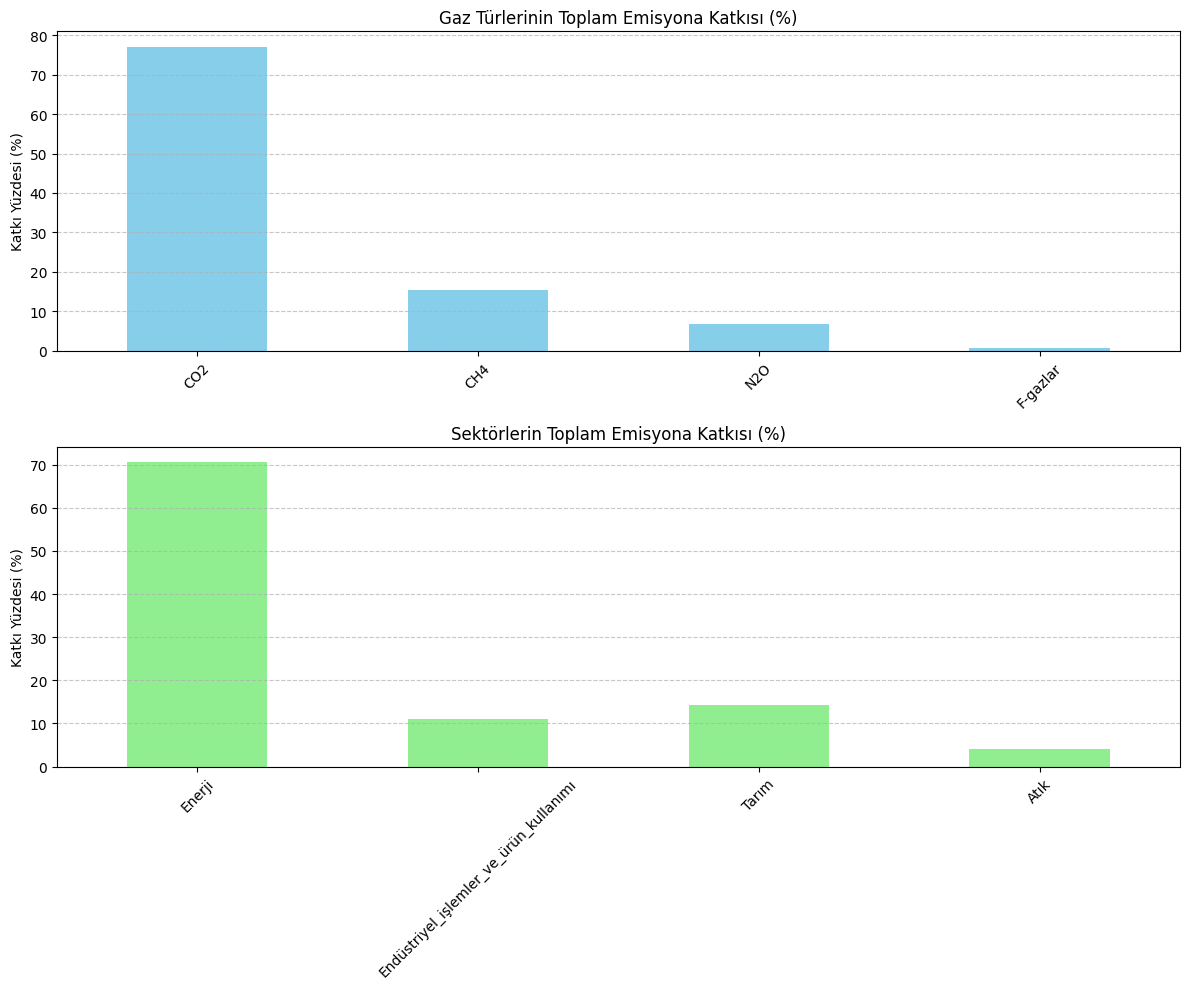

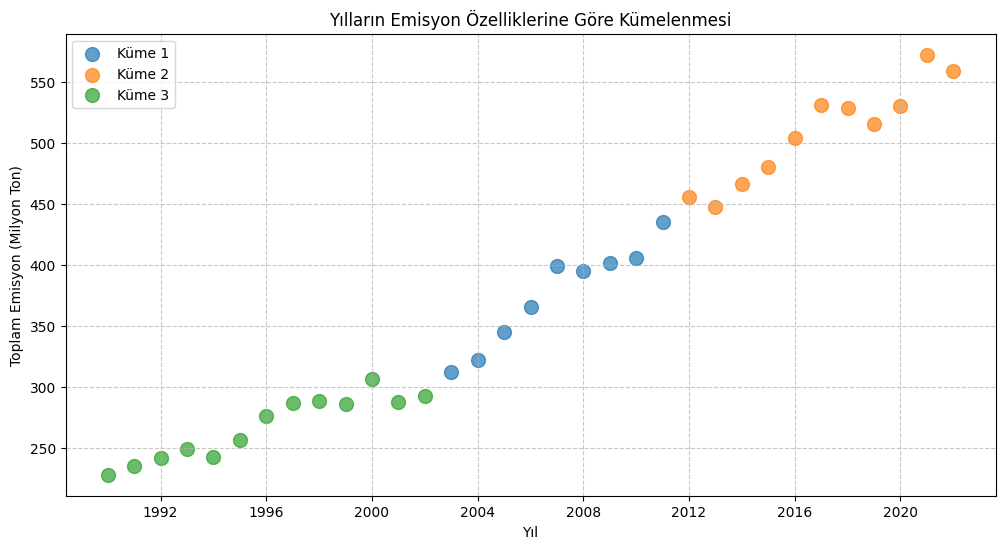

<Figure size 1000x600 with 0 Axes>

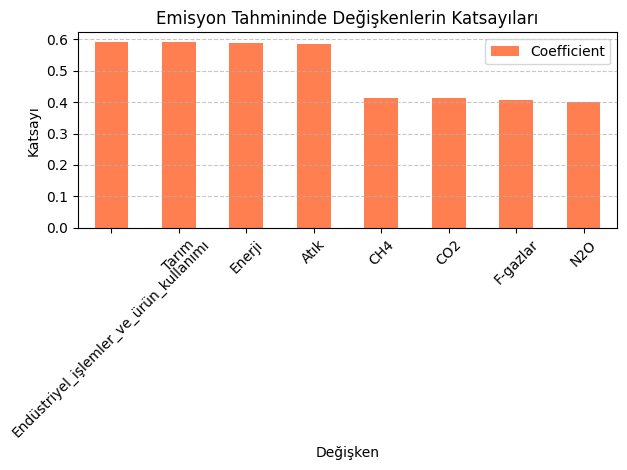

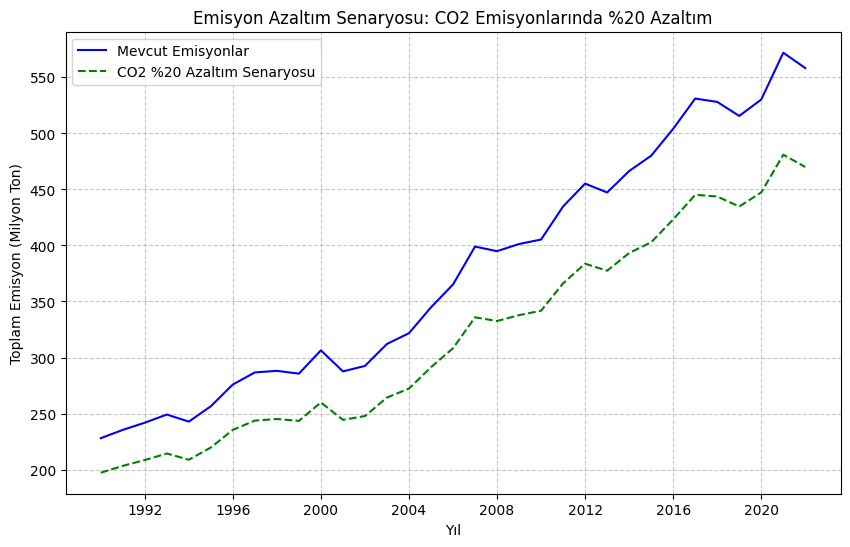

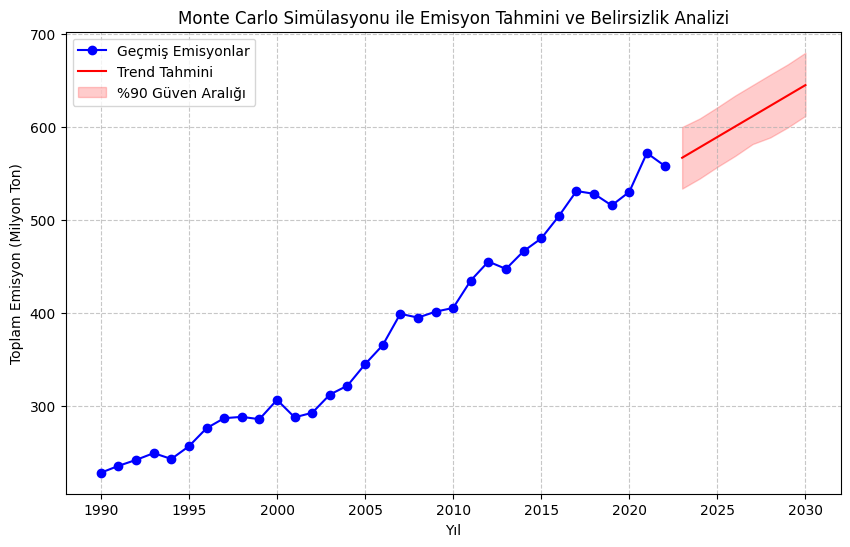

Gaz Türlerinin Toplam Emisyona Katkısı (%):
CO2         77.132571
CH4         15.449337
N2O          6.726991
F-gazlar     0.688691
dtype: float64

Sektörlerin Toplam Emisyona Katkısı (%):
Enerji                                    70.515674
Endüstriyel_işlemler_ve_ürün_kullanımı    11.116290
Tarım                                     14.275267
Atık                                       4.092768
dtype: float64

Regresyon Modeli Katsayıları:
                                  Feature  Coefficient
5  Endüstriyel_işlemler_ve_ürün_kullanımı     0.591871
6                                   Tarım     0.591009
4                                  Enerji     0.588601
7                                    Atık     0.582952
1                                     CH4     0.412323
0                                     CO2     0.411414
3                                F-gazlar     0.405842
2                                     N2O     0.400129

Kümeleme Analizi Sonuçları:
Küme 1: [2003, 2004, 2005, 2006, 

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Excel dosyalarını yükleyelim
df_gas = pd.read_excel("sera-gazlari.xlsx")
df_sector = pd.read_excel("sektorler.xlsx")

# Sütun adlarını temizleyelim
df_gas.columns = df_gas.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')
df_sector.columns = df_sector.columns.str.strip().str.replace('\n', '').str.replace(' ', '_')

# Yıl sütunlarını datetime formatına çevirelim
df_gas["Yıl"] = pd.to_datetime(df_gas["Yıl"], format="%Y")
df_sector["Yıl"] = pd.to_datetime(df_sector["Yıl"], format="%Y")

# İki veri setini birleştirelim
merged_data = pd.merge(df_gas, df_sector, on="Yıl")

# Eksik verileri kaldıralım
merged_data = merged_data.dropna()

# Shapley değerleri için basit bir yaklaşım (gerçek Shapley değerleri için daha karmaşık hesaplamalar gerekir)
# Burada her sektörün ve gaz türünün toplam emisyona katkısını hesaplayacağız

# Gaz türlerinin katkısı
gas_types = ["CO2", "CH4", "N2O", "F-gazlar"]
gas_contribution = merged_data[gas_types].mean() / merged_data["Toplam_x"].mean() * 100

# Sektörlerin katkısı
sectors = ["Enerji", "Endüstriyel_işlemler_ve_ürün_kullanımı",
           "Tarım", "Atık"]
sector_contribution = merged_data[sectors].mean() / merged_data["Toplam_y"].mean() * 100

# Shapley değerlerini görselleştirelim
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
gas_contribution.plot(kind='bar', color='skyblue')
plt.title('Gaz Türlerinin Toplam Emisyona Katkısı (%)')
plt.ylabel('Katkı Yüzdesi (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sector_contribution.plot(kind='bar', color='lightgreen')
plt.title('Sektörlerin Toplam Emisyona Katkısı (%)')
plt.ylabel('Katkı Yüzdesi (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Kümeleme analizi ile yılları gruplandıralım
# Önce verileri standartlaştıralım
scaler = StandardScaler()
features = merged_data[gas_types + sectors].values
features_scaled = scaler.fit_transform(features)

# K-means kümeleme
kmeans = KMeans(n_clusters=3, random_state=42)
merged_data['Cluster'] = kmeans.fit_predict(features_scaled)

# Kümeleme sonuçlarını görselleştirelim
plt.figure(figsize=(12, 6))
for cluster in range(3):
    cluster_data = merged_data[merged_data['Cluster'] == cluster]
    plt.scatter(cluster_data['Yıl'], cluster_data['Toplam_x'],
                label=f'Küme {cluster+1}', s=100, alpha=0.7)

plt.title('Yılların Emisyon Özelliklerine Göre Kümelenmesi')
plt.xlabel('Yıl')
plt.ylabel('Toplam Emisyon (Milyon Ton)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Regresyon modeli ile toplam emisyonu tahmin edelim
X = merged_data[gas_types + sectors]
y = merged_data['Toplam_x']

model = LinearRegression()
model.fit(X, y)

# Katsayıları görelim
coefficients = pd.DataFrame({
    'Feature': gas_types + sectors,
    'Coefficient': model.coef_
})
coefficients = coefficients.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
coefficients.plot(x='Feature', y='Coefficient', kind='bar', color='coral')
plt.title('Emisyon Tahmininde Değişkenlerin Katsayıları')
plt.xlabel('Değişken')
plt.ylabel('Katsayı')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Senaryo analizi: Emisyon azaltım senaryoları
# Basit bir senaryo: CO2 emisyonlarını %20 azaltma
scenario_data = merged_data.copy()
scenario_data['CO2_reduced'] = scenario_data['CO2'] * 0.8  # %20 azaltım
scenario_data['New_Total'] = scenario_data['Toplam_x'] - (scenario_data['CO2'] - scenario_data['CO2_reduced'])

plt.figure(figsize=(10, 6))
plt.plot(scenario_data['Yıl'], scenario_data['Toplam_x'], label='Mevcut Emisyonlar', color='blue')
plt.plot(scenario_data['Yıl'], scenario_data['New_Total'], label='CO2 %20 Azaltım Senaryosu', color='green', linestyle='--')
plt.title('Emisyon Azaltım Senaryosu: CO2 Emisyonlarında %20 Azaltım')
plt.xlabel('Yıl')
plt.ylabel('Toplam Emisyon (Milyon Ton)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Monte Carlo simülasyonu ile belirsizlik analizi
np.random.seed(42)
n_simulations = 1000
future_years = np.arange(2023, 2031)
results = np.zeros((len(future_years), n_simulations))

# Basit lineer trend + rastgele varyasyon
years = merged_data['Yıl'].dt.year.values
emissions = merged_data['Toplam_x'].values
slope, intercept = np.polyfit(years, emissions, 1)

for i in range(n_simulations):
    # Rastgele varyasyon ekleyelim
    noise = np.random.normal(0, 20, len(future_years))  # 20 milyon ton standart sapma
    results[:, i] = slope * future_years + intercept + noise

# Sonuçları görselleştirelim
plt.figure(figsize=(10, 6))
plt.plot(years, emissions, 'bo-', label='Geçmiş Emisyonlar')
plt.plot(future_years, slope * future_years + intercept, 'r-', label='Trend Tahmini')

# %90 güven aralığı
lower_bound = np.percentile(results, 5, axis=1)
upper_bound = np.percentile(results, 95, axis=1)
plt.fill_between(future_years, lower_bound, upper_bound, color='red', alpha=0.2, label='%90 Güven Aralığı')

plt.title('Monte Carlo Simülasyonu ile Emisyon Tahmini ve Belirsizlik Analizi')
plt.xlabel('Yıl')
plt.ylabel('Toplam Emisyon (Milyon Ton)')
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.show()

# Sonuçları özetleyelim
print("Gaz Türlerinin Toplam Emisyona Katkısı (%):")
print(gas_contribution)
print("\nSektörlerin Toplam Emisyona Katkısı (%):")
print(sector_contribution)
print("\nRegresyon Modeli Katsayıları:")
print(coefficients)
print("\nKümeleme Analizi Sonuçları:")
cluster_summary = merged_data.groupby('Cluster')['Yıl'].apply(lambda x: [y.year for y in x]).to_dict()
for cluster, years in cluster_summary.items():
    print(f"Küme {cluster+1}: {years}")
print("\nMonte Carlo Simülasyonu 2030 Tahmini:")
print(f"Ortalama: {np.mean(results[-1]):.2f} Milyon Ton")
print(f"%90 Güven Aralığı: ({lower_bound[-1]:.2f}, {upper_bound[-1]:.2f}) Milyon Ton")